In [1]:
import jax
import jax.numpy as jnp
import surrojax_gp
import approx_post
import oed_toolbox
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '..')
import plotting_helpers
import computation_helpers

In [2]:
prng = jax.random.PRNGKey(42)

Load our previously trained model from Notebook \[1\]

In [3]:
beam_gp = surrojax_gp.load_gp('nonlinear_beam_gp.json')

Let's define our prior and noise covariance:

In [4]:
noise_cov = 0.005*jnp.identity(1)
prior_cov = 0.01*jnp.identity(1)
prior_mean = 0.5*jnp.ones((1,))
prior = oed_toolbox.distributions.Prior.gaussian(prior_mean, prior_cov)
beam_model = oed_toolbox.models.Model.from_surrojax_gp(beam_gp)
likelihood = oed_toolbox.distributions.Likelihood.from_model_plus_constant_gaussian_noise(beam_model, noise_cov)
joint = oed_toolbox.distributions.Joint.from_prior_and_likelihood(prior, likelihood)

<AxesSubplot:>

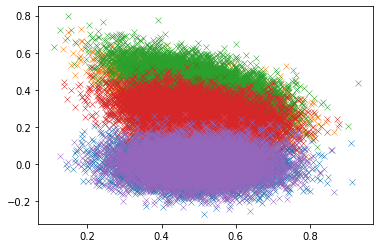

In [5]:
d = 1.0
joint_samples = joint.sample(d,10000)
sns.scatterplot(x=joint_samples['theta'].squeeze(), y=joint_samples['y'].squeeze(), marker='x')
d = 0.75
joint_samples = joint.sample(d,10000)
sns.scatterplot(x=joint_samples['theta'].squeeze(), y=joint_samples['y'].squeeze(), marker='x')
d = 0.5
joint_samples = joint.sample(d,10000)
sns.scatterplot(x=joint_samples['theta'].squeeze(), y=joint_samples['y'].squeeze(), marker='x')
d = 0.25
joint_samples = joint.sample(d,10000)
sns.scatterplot(x=joint_samples['theta'].squeeze(), y=joint_samples['y'].squeeze(), marker='x')
d = 0.0
joint_samples = joint.sample(d,10000)
sns.scatterplot(x=joint_samples['theta'].squeeze(), y=joint_samples['y'].squeeze(), marker='x')

In [18]:
max_iter = 200
num_samples = 1000
y_lims = (0.0, 1.0)
d_lims = (0.0, 1.0)
num_y_pts = num_d_pts = 20
num_layers = 3
nn_width = 5
prng = jax.random.PRNGKey(42)
activation = 'tanh'
phi_lims = {'mean': {'lb':-0.1, 'ub':1.1}, 'log_chol_diag': {'lb':-4, 'ub':-1.}}
forward_approx, loss_history = \
computation_helpers.train_nn_amortised_normal_approx(beam_gp, y_lims, d_lims, num_y_pts, num_d_pts, 
                                                     noise_cov, prior_mean, prior_cov, 
                                                     prng, num_samples, max_iter,
                                                     num_layers, nn_width, activation, phi_lims,
                                                     loss_name='reverse_kl', 
                                                     use_reparameterisation=True)

Loss = 14.316368103027344, Params = Jaxtainer({'W_0': DeviceArray([[ 0.49958706, -0.59825855, -0.8269131 ,  1.374682  ,
               1.1692085 ],
             [-0.83285594, -0.53137475, -0.6186396 ,  0.464943  ,
               0.5310786 ]], dtype=float32), 'b_0': DeviceArray([ 0.09999999, -0.09999999,  0.09999999,  0.09999996,
              0.1       ], dtype=float32), 'W_1': DeviceArray([[ 1.0321599 ,  0.538413  ,  0.32784522,  1.0680667 ,
               0.7612635 ],
             [ 0.02914048,  0.21058121, -0.11349206, -0.7774883 ,
               0.74581635],
             [ 0.5002881 , -0.52292466,  0.93664485, -0.11255971,
               0.1303569 ],
             [ 0.6561111 , -0.7355271 , -0.67245317,  0.356501  ,
              -0.21798661],
             [-0.6550796 , -0.41166303,  0.9891853 ,  0.69305456,
              -0.19637498]], dtype=float32), 'b_1': DeviceArray([-0.09999998, -0.1       ,  0.09999999,  0.1       ,
              0.09999999], dtype=float32), 'W_2': DeviceArra

Loss = 13.950230598449707, Params = Jaxtainer({'W_0': DeviceArray([[ 0.40979832, -0.5409297 , -0.86505145,  1.2795156 ,
               1.2284645 ],
             [-0.8752198 , -0.51411974, -0.6347084 ,  0.36397332,
               0.5597631 ]], dtype=float32), 'b_0': DeviceArray([ 0.0711253 , -0.12794028,  0.14324562, -0.12383832,
              0.23220436], dtype=float32), 'W_1': DeviceArray([[ 0.77794707,  0.8644762 ,  0.04935724,  1.1319162 ,
               1.0530988 ],
             [ 0.10884571,  0.40038323, -0.06415382, -0.8513448 ,
               0.65551484],
             [ 0.6327667 , -0.31468105,  0.99212843, -0.26525894,
              -0.06029326],
             [ 0.5700626 , -0.9343884 , -0.72198844,  0.4592826 ,
              -0.10684723],
             [-0.73470503, -0.60335594,  0.94370884,  0.777334  ,
              -0.09991688]], dtype=float32), 'b_1': DeviceArray([-0.12704036, -0.28891078,  0.09744906,  0.06069035,
              0.10296177], dtype=float32), 'W_2': DeviceArra

Loss = 13.787541389465332, Params = Jaxtainer({'W_0': DeviceArray([[ 0.29906398, -0.43181962, -0.9738493 ,  1.2571826 ,
               1.1582783 ],
             [-0.9922308 , -0.43284866, -0.7297147 ,  0.5229314 ,
               0.39768705]], dtype=float32), 'b_0': DeviceArray([-0.03265752, -0.08641313,  0.09617468, -0.04920492,
              0.14153892], dtype=float32), 'W_1': DeviceArray([[ 6.2970603e-01,  1.0085058e+00, -2.5843820e-03,
               1.2315917e+00,  1.2320904e+00],
             [ 2.1394862e-01,  4.7723484e-01,  4.7328077e-02,
              -8.7676412e-01,  5.6446749e-01],
             [ 7.5487357e-01, -2.1303105e-01,  1.1137676e+00,
              -3.4278873e-01, -1.9285315e-01],
             [ 4.6104273e-01, -1.0270371e+00, -8.2636708e-01,
               5.1273972e-01,  4.5041367e-04],
             [-8.3788800e-01, -6.8403411e-01,  8.3206344e-01,
               8.0572438e-01, -1.2055844e-02]], dtype=float32), 'b_1': DeviceArray([-0.19784892, -0.36200297,  0.01327689

Loss = 13.475790977478027, Params = Jaxtainer({'W_0': DeviceArray([[ 0.23373726, -0.3507377 , -1.0422235 ,  1.2302992 ,
               1.0979673 ],
             [-1.0774271 , -0.34300092, -0.7833938 ,  0.55832523,
               0.24153835]], dtype=float32), 'b_0': DeviceArray([-0.11719703, -0.03104635,  0.06635556, -0.03239186,
              0.02168825], dtype=float32), 'W_1': DeviceArray([[ 0.5325314 ,  1.065849  , -0.03939793,  1.4425385 ,
               1.3761202 ],
             [ 0.2803489 ,  0.5219658 ,  0.11832963, -0.8570602 ,
               0.50646585],
             [ 0.83115596, -0.15181626,  1.1895353 , -0.34201083,
              -0.27881452],
             [ 0.39261577, -1.0828542 , -0.89174724,  0.51037645,
               0.07059085],
             [-0.90339005, -0.7315975 ,  0.76038   ,  0.78977746,
               0.04496635]], dtype=float32), 'b_1': DeviceArray([-0.24368478, -0.39888301, -0.04321122, -0.05939559,
              0.1469866 ], dtype=float32), 'W_2': DeviceArra

Loss = 13.198713302612305, Params = Jaxtainer({'W_0': DeviceArray([[ 0.21676093, -0.32761142, -1.080651  ,  1.1609668 ,
               1.0535456 ],
             [-1.1547686 , -0.21480834, -0.7924445 ,  0.40986753,
               0.0510862 ]], dtype=float32), 'b_0': DeviceArray([-0.23492956,  0.10156418,  0.07338186, -0.19517878,
             -0.18619694], dtype=float32), 'W_1': DeviceArray([[ 0.45256636,  1.0022267 , -0.09656717,  1.6186082 ,
               1.5116978 ],
             [ 0.32248896,  0.5399778 ,  0.16285166, -0.78818434,
               0.47319612],
             [ 0.87713057, -0.12524101,  1.2335862 , -0.2675003 ,
              -0.33100444],
             [ 0.35003215, -1.1072153 , -0.93135625,  0.45674223,
               0.11594284],
             [-0.94487464, -0.752071  ,  0.715298  ,  0.75364685,
               0.08351608]], dtype=float32), 'b_1': DeviceArray([-0.2702581 , -0.38612667, -0.07470884, -0.22067645,
              0.12936714], dtype=float32), 'W_2': DeviceArra

Loss = 11.869681358337402, Params = Jaxtainer({'W_0': DeviceArray([[ 0.25664374, -0.39322835, -1.0803467 ,  1.0829538 ,
               1.0793041 ],
             [-1.1573929 , -0.22328447, -0.7766419 ,  0.29817754,
              -0.00187867]], dtype=float32), 'b_0': DeviceArray([-0.350354  ,  0.19804315,  0.11955648, -0.40206686,
             -0.34656593], dtype=float32), 'W_1': DeviceArray([[ 0.39212558,  0.84230536, -0.16042899,  1.6058239 ,
               1.5230231 ],
             [ 0.35009995,  0.53718114,  0.19193156, -0.8485746 ,
               0.43230957],
             [ 0.90351665, -0.15754725,  1.2546145 , -0.32771933,
              -0.40505227],
             [ 0.3231409 , -1.0962206 , -0.9556971 ,  0.5565337 ,
               0.18664071],
             [-0.9716315 , -0.74377394,  0.6860132 ,  0.8709457 ,
               0.14484912]], dtype=float32), 'b_1': DeviceArray([-0.28597426, -0.2936265 , -0.08603893, -0.28205943,
              0.11174484], dtype=float32), 'W_2': DeviceArra

Loss = 11.272578239440918, Params = Jaxtainer({'W_0': DeviceArray([[ 0.26861608, -0.44660407, -1.0310752 ,  1.0464578 ,
               1.1041107 ],
             [-1.1056917 , -0.30432448, -0.7581492 ,  0.31545073,
               0.0479879 ]], dtype=float32), 'b_0': DeviceArray([-0.484114  ,  0.26085654,  0.20588507, -0.5316194 ,
             -0.44498938], dtype=float32), 'W_1': DeviceArray([[ 0.3470281 ,  0.85939187, -0.17984784,  1.5490329 ,
               1.4608848 ],
             [ 0.36742142,  0.4557827 ,  0.21065043, -0.9547494 ,
               0.37315902],
             [ 0.91371906, -0.2537372 ,  1.2618713 , -0.39161977,
              -0.4967529 ],
             [ 0.30829507, -0.9774752 , -0.96899384,  0.67299396,
               0.2828732 ],
             [-0.9866242 , -0.6227285 ,  0.6700475 ,  0.9875233 ,
               0.22484815]], dtype=float32), 'b_1': DeviceArray([-0.29194617, -0.25897828, -0.08759044, -0.317166  ,
              0.10478842], dtype=float32), 'W_2': DeviceArra

Loss = 10.458377838134766, Params = Jaxtainer({'W_0': DeviceArray([[ 0.26973167, -0.48503783, -0.977289  ,  1.034796  ,
               1.1206465 ],
             [-1.0538533 , -0.36887226, -0.74413395,  0.34238526,
               0.08803176]], dtype=float32), 'b_0': DeviceArray([-0.5925016 ,  0.2891645 ,  0.2801215 , -0.5851755 ,
             -0.49824977], dtype=float32), 'W_1': DeviceArray([[ 0.33936778,  1.0251455 , -0.15374349,  1.5056363 ,
               1.4076816 ],
             [ 0.37553376,  0.27004543,  0.2187091 , -1.0363033 ,
               0.31860167],
             [ 0.91401845, -0.3514727 ,  1.2600331 , -0.43696636,
              -0.5684257 ],
             [ 0.3048545 , -0.7440174 , -0.97018856,  0.7728284 ,
               0.3703286 ],
             [-0.9908418 , -0.39304227,  0.66648895,  1.0797851 ,
               0.29901373]], dtype=float32), 'b_1': DeviceArray([-0.30095094, -0.3872225 , -0.09522113, -0.3363799 ,
              0.10174726], dtype=float32), 'W_2': DeviceArra

Loss = 9.719841003417969, Params = Jaxtainer({'W_0': DeviceArray([[ 0.30985084, -0.51517534, -0.9612754 ,  1.0357026 ,
               1.1275502 ],
             [-1.033573  , -0.3480182 , -0.69316345,  0.28989467,
               0.04245567]], dtype=float32), 'b_0': DeviceArray([-0.6356997 ,  0.31470037,  0.3237955 , -0.627636  ,
             -0.5479875 ], dtype=float32), 'W_1': DeviceArray([[ 0.3347992 ,  1.1043726 , -0.15717374,  1.5096402 ,
               1.3866776 ],
             [ 0.37779787,  0.11587961,  0.21809113, -1.0482711 ,
               0.28998822],
             [ 0.90852857, -0.4262942 ,  1.25058   , -0.44766548,
              -0.6088708 ],
             [ 0.30632886, -0.57677674, -0.9679592 ,  0.8310526 ,
               0.43038586],
             [-0.9912125 , -0.24582177,  0.66280013,  1.1470536 ,
               0.35789207]], dtype=float32), 'b_1': DeviceArray([-0.30938452, -0.46856016, -0.10199803, -0.35736147,
              0.1001757 ], dtype=float32), 'W_2': DeviceArray

Loss = 9.698381423950195, Params = Jaxtainer({'W_0': DeviceArray([[ 0.34828758, -0.5290957 , -0.96455854,  1.0356501 ,
               1.1201671 ],
             [-1.030037  , -0.29879084, -0.63828653,  0.21943729,
              -0.03023943]], dtype=float32), 'b_0': DeviceArray([-0.655843  ,  0.3435086 ,  0.34025624, -0.6622625 ,
             -0.5987622 ], dtype=float32), 'W_1': DeviceArray([[ 0.34551358,  1.1439934 , -0.13846105,  1.5325388 ,
               1.3640349 ],
             [ 0.3760817 , -0.00167847,  0.21280305, -1.0272319 ,
               0.27713227],
             [ 0.9006208 , -0.47962514,  1.245281  , -0.43774757,
              -0.63973093],
             [ 0.31158504, -0.4611415 , -0.9627441 ,  0.85842955,
               0.47129774],
             [-0.98846006, -0.15308233,  0.65981054,  1.1882559 ,
               0.40657884]], dtype=float32), 'b_1': DeviceArray([-0.32024008, -0.5167699 , -0.12073468, -0.38383678,
              0.11550856], dtype=float32), 'W_2': DeviceArray

Loss = 9.205718040466309, Params = Jaxtainer({'W_0': DeviceArray([[ 0.36498168, -0.5496208 , -0.9541271 ,  1.0409725 ,
               1.1282257 ],
             [-1.0000463 , -0.2994637 , -0.60637987,  0.19816744,
              -0.04353402]], dtype=float32), 'b_0': DeviceArray([-0.6842121 ,  0.36090752,  0.36687642, -0.68975013,
             -0.62978214], dtype=float32), 'W_1': DeviceArray([[ 0.35481796,  1.1700455 , -0.14072387,  1.5282488 ,
               1.3654896 ],
             [ 0.37282577, -0.06879852,  0.20511436, -1.0461309 ,
               0.27740562],
             [ 0.89042795, -0.5134139 ,  1.2305115 , -0.45072863,
              -0.6469582 ],
             [ 0.31785116, -0.3936648 , -0.95625645,  0.9062263 ,
               0.49616787],
             [-0.9842317 , -0.09482577,  0.6599177 ,  1.2373149 ,
               0.439976  ]], dtype=float32), 'b_1': DeviceArray([-0.32776228, -0.5355913 , -0.12483411, -0.39540553,
              0.11311858], dtype=float32), 'W_2': DeviceArray

Loss = 9.251174926757812, Params = Jaxtainer({'W_0': DeviceArray([[ 0.36318797, -0.5656048 , -0.94519794,  1.048331  ,
               1.138643  ],
             [-0.9552194 , -0.3264547 , -0.60233027,  0.20979133,
              -0.0233559 ]], dtype=float32), 'b_0': DeviceArray([-0.7183138 ,  0.37534675,  0.38577926, -0.7086677 ,
             -0.65094525], dtype=float32), 'W_1': DeviceArray([[ 0.37588587,  1.1963457 , -0.12835059,  1.5118206 ,
               1.3496623 ],
             [ 0.369398  , -0.10432175,  0.1987395 , -1.0807859 ,
               0.2758455 ],
             [ 0.88249093, -0.53218687,  1.2215881 , -0.47109476,
              -0.660582  ],
             [ 0.3242497 , -0.35207567, -0.949873  ,  0.95521235,
               0.5147345 ],
             [-0.979515  , -0.05323588,  0.6612362 ,  1.2789122 ,
               0.46720764]], dtype=float32), 'b_1': DeviceArray([-0.3364509 , -0.5447142 , -0.13362356, -0.40223944,
              0.12664312], dtype=float32), 'W_2': DeviceArray

Loss = 9.091137886047363, Params = Jaxtainer({'W_0': DeviceArray([[ 0.3739519 , -0.58317125, -0.9547818 ,  1.0623363 ,
               1.1519377 ],
             [-0.9164217 , -0.34163517, -0.5852844 ,  0.2063788 ,
              -0.01699602]], dtype=float32), 'b_0': DeviceArray([-0.7319614 ,  0.3824427 ,  0.38855454, -0.71724087,
             -0.66310596], dtype=float32), 'W_1': DeviceArray([[ 0.3863501 ,  1.2151302 , -0.12423439,  1.4983493 ,
               1.3412826 ],
             [ 0.3659586 , -0.12912238,  0.19168623, -1.1063142 ,
               0.28492782],
             [ 0.8751564 , -0.5438041 ,  1.2132359 , -0.48728216,
              -0.66533494],
             [ 0.32873666, -0.32859048, -0.9466695 ,  0.99430764,
               0.525448  ],
             [-0.97729063, -0.03502687,  0.65681094,  1.3162006 ,
               0.494725  ]], dtype=float32), 'b_1': DeviceArray([-0.34338373, -0.554556  , -0.14411041, -0.4039853 ,
              0.14516617], dtype=float32), 'W_2': DeviceArray

Loss = 9.057332992553711, Params = Jaxtainer({'W_0': DeviceArray([[ 0.38584203, -0.58746845, -0.97293377,  1.0679132 ,
               1.1507337 ],
             [-0.89544654, -0.33049068, -0.5508738 ,  0.17503297,
              -0.04123452]], dtype=float32), 'b_0': DeviceArray([-0.73687667,  0.39630872,  0.38049573, -0.7284315 ,
             -0.68281347], dtype=float32), 'W_1': DeviceArray([[ 0.39547104,  1.2233484 , -0.11610426,  1.5012089 ,
               1.3303262 ],
             [ 0.36236513, -0.15887907,  0.18388724, -1.1062728 ,
               0.3021601 ],
             [ 0.8690621 , -0.55788386,  1.20808   , -0.48704544,
              -0.6677144 ],
             [ 0.33230922, -0.30812177, -0.94456583,  1.0125287 ,
               0.5292564 ],
             [-0.9764682 , -0.02470643,  0.649175  ,  1.337772  ,
               0.52213377]], dtype=float32), 'b_1': DeviceArray([-0.3508942 , -0.5619147 , -0.16164105, -0.41419023,
              0.17526938], dtype=float32), 'W_2': DeviceArray

Loss = 8.981942176818848, Params = Jaxtainer({'W_0': DeviceArray([[ 0.38878095, -0.58826953, -0.98628724,  1.0708511 ,
               1.1483171 ],
             [-0.870811  , -0.32974082, -0.52252036,  0.15518631,
              -0.05232927]], dtype=float32), 'b_0': DeviceArray([-0.745473  ,  0.40965706,  0.37510106, -0.73905474,
             -0.6997692 ], dtype=float32), 'W_1': DeviceArray([[ 0.4014485 ,  1.2278049 , -0.1133547 ,  1.5009308 ,
               1.3250035 ],
             [ 0.3587554 , -0.18070263,  0.17628849, -1.1121925 ,
               0.3225162 ],
             [ 0.86309993, -0.57026684,  1.2020768 , -0.48832503,
              -0.6651074 ],
             [ 0.3354071 , -0.2943445 , -0.9433232 ,  1.0291183 ,
               0.52966857],
             [-0.97597224, -0.01841363,  0.64140224,  1.3545123 ,
               0.5458097 ]], dtype=float32), 'b_1': DeviceArray([-0.3571571 , -0.5639339 , -0.1756402 , -0.42346525,
              0.2007191 ], dtype=float32), 'W_2': DeviceArray

Loss = 8.960253715515137, Params = Jaxtainer({'W_0': DeviceArray([[ 0.38817278, -0.59354395, -0.99766845,  1.0790646 ,
               1.1541011 ],
             [-0.8344971 , -0.3489246 , -0.50922847,  0.1586325 ,
              -0.03849206]], dtype=float32), 'b_0': DeviceArray([-0.7547006 ,  0.41629523,  0.3703042 , -0.7428548 ,
             -0.7065619 ], dtype=float32), 'W_1': DeviceArray([[ 0.40754163,  1.2337859 , -0.11201984,  1.4904349 ,
               1.3202729 ],
             [ 0.35520396, -0.19137077,  0.16980684, -1.1329784 ,
               0.34070373],
             [ 0.85745955, -0.5777539 ,  1.1968389 , -0.49838364,
              -0.6628152 ],
             [ 0.338392  , -0.28743362, -0.9428997 ,  1.0508039 ,
               0.53022355],
             [-0.975244  , -0.01499738,  0.6343564 ,  1.3719709 ,
               0.5665233 ]], dtype=float32), 'b_1': DeviceArray([-0.3626586 , -0.56416804, -0.18667209, -0.42570996,
              0.22272475], dtype=float32), 'W_2': DeviceArray

Loss = 8.910046577453613, Params = Jaxtainer({'W_0': DeviceArray([[ 0.38844714, -0.595609  , -1.0107812 ,  1.085443  ,
               1.1569527 ],
             [-0.80392   , -0.36203626, -0.49494883,  0.15689854,
              -0.03179703]], dtype=float32), 'b_0': DeviceArray([-0.76016295,  0.42303142,  0.3623076 , -0.74555546,
             -0.7129004 ], dtype=float32), 'W_1': DeviceArray([[ 0.41356963,  1.2359138 , -0.10841942,  1.4835658 ,
               1.3122662 ],
             [ 0.35169464, -0.2043996 ,  0.16409037, -1.1470071 ,
               0.35905853],
             [ 0.85258144, -0.5864071 ,  1.1944995 , -0.50456464,
              -0.66353506],
             [ 0.34108645, -0.2802821 , -0.9433617 ,  1.0659937 ,
               0.53021973],
             [-0.9746595 , -0.01181336,  0.6270897 ,  1.3842673 ,
               0.5861117 ]], dtype=float32), 'b_1': DeviceArray([-0.36801   , -0.5628237 , -0.19885308, -0.4288351 ,
              0.24845685], dtype=float32), 'W_2': DeviceArray

Loss = 8.902573585510254, Params = Jaxtainer({'W_0': DeviceArray([[ 0.3894532 , -0.59211993, -1.0227867 ,  1.0860469 ,
               1.1526067 ],
             [-0.7854654 , -0.3608826 , -0.47215366,  0.1398802 ,
              -0.04288772]], dtype=float32), 'b_0': DeviceArray([-0.76297134,  0.43280303,  0.3547082 , -0.75170666,
             -0.72366947], dtype=float32), 'W_1': DeviceArray([[ 0.41586703,  1.2300075 , -0.10620505,  1.4848721 ,
               1.3071457 ],
             [ 0.34818488, -0.22527568,  0.15869991, -1.1478148 ,
               0.38015106],
             [ 0.8478014 , -0.60025406,  1.1934735 , -0.50300485,
              -0.6629567 ],
             [ 0.34336683, -0.27046007, -0.9447561 ,  1.0723339 ,
               0.5293539 ],
             [-0.9743557 , -0.00749579,  0.6194169 ,  1.3906233 ,
               0.6045332 ]], dtype=float32), 'b_1': DeviceArray([-0.37225965, -0.5568955 , -0.21030758, -0.43602446,
              0.27244443], dtype=float32), 'W_2': DeviceArray

Loss = 8.861096382141113, Params = Jaxtainer({'W_0': DeviceArray([[ 0.39300737, -0.5932696 , -1.0352181 ,  1.0908797 ,
               1.1537595 ],
             [-0.76277333, -0.36614817, -0.4583789 ,  0.13230419,
              -0.04555972]], dtype=float32), 'b_0': DeviceArray([-0.7625805 ,  0.4369531 ,  0.34603453, -0.7527085 ,
             -0.72790533], dtype=float32), 'W_1': DeviceArray([[ 0.4188577 ,  1.2247626 , -0.10261114,  1.4818509 ,
               1.3011904 ],
             [ 0.34493592, -0.24212281,  0.15466465, -1.1538523 ,
               0.3974806 ],
             [ 0.84346575, -0.6125425 ,  1.1939869 , -0.50553685,
              -0.6634579 ],
             [ 0.34562615, -0.2619733 , -0.94648   ,  1.0804557 ,
               0.5285712 ],
             [-0.9737118 , -0.00291496,  0.6127611 ,  1.3982412 ,
               0.6191005 ]], dtype=float32), 'b_1': DeviceArray([-0.3759435 , -0.55053633, -0.22046837, -0.4383909 ,
              0.2929091 ], dtype=float32), 'W_2': DeviceArray

Loss = 8.797102928161621, Params = Jaxtainer({'W_0': DeviceArray([[ 0.38816184, -0.5897293 , -1.0383765 ,  1.0893165 ,
               1.1494746 ],
             [-0.7404319 , -0.3729609 , -0.44952574,  0.12925929,
              -0.04490563]], dtype=float32), 'b_0': DeviceArray([-0.7694222 ,  0.44451255,  0.3456697 , -0.75881916,
             -0.7362122 ], dtype=float32), 'W_1': DeviceArray([[ 0.41763893,  1.2145733 , -0.10252031,  1.4807087 ,
               1.2977816 ],
             [ 0.34219941, -0.25785577,  0.15200579, -1.1599426 ,
               0.40977514],
             [ 0.8389328 , -0.6291856 ,  1.193687  , -0.5056244 ,
              -0.6623198 ],
             [ 0.3474379 , -0.25198933, -0.94867057,  1.0859947 ,
               0.5279374 ],
             [-0.9731098 ,  0.0055447 ,  0.6070798 ,  1.4019772 ,
               0.6288274 ]], dtype=float32), 'b_1': DeviceArray([-0.37754583, -0.5366605 , -0.22600375, -0.4439066 ,
              0.30485505], dtype=float32), 'W_2': DeviceArray

Loss = 8.63919734954834, Params = Jaxtainer({'W_0': DeviceArray([[ 0.3866117 , -0.5862575 , -1.0458962 ,  1.0901313 ,
               1.146519  ],
             [-0.71808404, -0.37631845, -0.44828233,  0.12791838,
              -0.04555744]], dtype=float32), 'b_0': DeviceArray([-0.772086  ,  0.4506815 ,  0.3408609 , -0.76096016,
             -0.74142003], dtype=float32), 'W_1': DeviceArray([[ 0.41696525,  1.2042    , -0.09510726,  1.479959  ,
               1.2764612 ],
             [ 0.34026125, -0.2748215 ,  0.15191111, -1.1624079 ,
               0.41009542],
             [ 0.83598006, -0.64613986,  1.1990979 , -0.50500625,
              -0.67717403],
             [ 0.3484893 , -0.23984341, -0.9523528 ,  1.0884541 ,
               0.5315949 ],
             [-0.97296405,  0.01663293,  0.60101444,  1.4034494 ,
               0.638613  ]], dtype=float32), 'b_1': DeviceArray([-0.37881693, -0.5225019 , -0.23435949, -0.44825727,
              0.32948074], dtype=float32), 'W_2': DeviceArray(

Loss = 9.030789375305176, Params = Jaxtainer({'W_0': DeviceArray([[ 0.40095294, -0.5978999 , -1.0654813 ,  1.1075938 ,
               1.1606501 ],
             [-0.6837295 , -0.39071828, -0.45962018,  0.14141381,
              -0.03226411]], dtype=float32), 'b_0': DeviceArray([-0.76094   ,  0.4430428 ,  0.32694715, -0.7481775 ,
             -0.7308869 ], dtype=float32), 'W_1': DeviceArray([[ 0.4151912 ,  1.1982602 , -0.08010192,  1.4677854 ,
               1.2421649 ],
             [ 0.33885607, -0.2871016 ,  0.15461348, -1.1741521 ,
               0.39801988],
             [ 0.83378404, -0.658292  ,  1.2113713 , -0.5163728 ,
              -0.7070738 ],
             [ 0.3489713 , -0.23108898, -0.9585393 ,  1.0990714 ,
               0.543551  ],
             [-0.9731428 ,  0.02576528,  0.5933829 ,  1.4125125 ,
               0.65287673]], dtype=float32), 'b_1': DeviceArray([-0.3793355 , -0.51161754, -0.24638884, -0.43994436,
              0.36338872], dtype=float32), 'W_2': DeviceArray

Loss = 12.464967727661133, Params = Jaxtainer({'W_0': DeviceArray([[ 0.2820414 , -0.42384684, -1.0301377 ,  0.9947394 ,
               1.0231985 ],
             [-0.7976766 , -0.22527511, -0.3959389 ,  0.02133784,
              -0.17052494]], dtype=float32), 'b_0': DeviceArray([-0.882454  ,  0.6185405 ,  0.3811154 , -0.86774826,
             -0.8733994 ], dtype=float32), 'W_1': DeviceArray([[ 4.1379189e-01,  1.1164274e+00, -2.3339875e-04,
               1.6036439e+00,  1.0544432e+00],
             [ 3.4028959e-01, -4.5167342e-01,  1.7048588e-01,
              -1.0038742e+00,  2.9645139e-01],
             [ 8.4496862e-01, -7.6561326e-01,  1.2939107e+00,
              -3.6561045e-01, -9.2614365e-01],
             [ 3.4036386e-01, -1.0504069e-01, -9.9504673e-01,
               9.5548105e-01,  7.0776653e-01],
             [-9.8216581e-01,  1.5381958e-01,  5.5749023e-01,
               1.2729042e+00,  7.9938877e-01]], dtype=float32), 'b_1': DeviceArray([-0.3802071 , -0.41300803, -0.30563867

Loss = 11.33635425567627, Params = Jaxtainer({'W_0': DeviceArray([[ 0.2391833 , -0.31290895, -1.0409967 ,  0.9656692 ,
               0.97130907],
             [-0.8479564 , -0.11862508, -0.30827343, -0.03710011,
              -0.23621783]], dtype=float32), 'b_0': DeviceArray([-0.9338878 ,  0.7299364 ,  0.44768977, -0.9207046 ,
             -0.9393205 ], dtype=float32), 'W_1': DeviceArray([[ 0.2711898 ,  1.1254001 , -0.03690116,  1.6777264 ,
               0.87985104],
             [ 0.38707963, -0.5223273 ,  0.24560392, -0.89183223,
               0.13124466],
             [ 0.86276   , -0.7541943 ,  1.3749053 , -0.27921978,
              -1.2059649 ],
             [ 0.27103788, -0.11822179, -1.115482  ,  0.8653976 ,
               1.0314822 ],
             [-1.0545002 ,  0.14735882,  0.4342373 ,  1.1838255 ,
               1.0755885 ]], dtype=float32), 'b_1': DeviceArray([-0.3254196 , -0.408011  , -0.2988944 , -0.67478245,
              0.7362785 ], dtype=float32), 'W_2': DeviceArray

Loss = 9.631714820861816, Params = Jaxtainer({'W_0': DeviceArray([[ 0.20910475, -0.24242826, -1.0162156 ,  0.94118786,
               0.93374157],
             [-0.8826094 , -0.05295175, -0.23937671, -0.07928139,
              -0.2830389 ]], dtype=float32), 'b_0': DeviceArray([-0.9714137,  0.8004342,  0.5246351, -0.9682198, -0.992707 ],            dtype=float32), 'W_1': DeviceArray([[ 1.6265340e-01,  1.1278007e+00, -7.2610654e-02,
               1.7267150e+00,  8.5577917e-01],
             [ 4.4088545e-01, -5.4598647e-01,  3.0901283e-01,
              -8.1615889e-01, -8.4395707e-04],
             [ 8.6163414e-01, -7.4546903e-01,  1.4081799e+00,
              -2.2184829e-01, -1.3022430e+00],
             [ 2.0469363e-01, -1.4950727e-01, -1.2048591e+00,
               8.0514967e-01,  1.2674930e+00],
             [-1.1237758e+00,  1.1827395e-01,  3.4326905e-01,
               1.1240902e+00,  1.2699161e+00]], dtype=float32), 'b_1': DeviceArray([-0.2639806 , -0.4018627 , -0.27966908, -0.730

Loss = 10.184527397155762, Params = Jaxtainer({'W_0': DeviceArray([[ 0.18927501, -0.20250082, -1.0335387 ,  0.94794595,
               0.92586267],
             [-0.9009816 , -0.02152738, -0.27941528, -0.06365304,
              -0.28291363]], dtype=float32), 'b_0': DeviceArray([-0.9982862 ,  0.8384293 ,  0.53644127, -0.98414135,
             -1.0155257 ], dtype=float32), 'W_1': DeviceArray([[ 0.23478444,  1.1468041 , -0.02869155,  1.7594271 ,
               0.8237192 ],
             [ 0.39667988, -0.58028316,  0.2973024 , -0.7653134 ,
              -0.05065308],
             [ 0.87123054, -0.731328  ,  1.4408338 , -0.18348911,
              -1.381597  ],
             [ 0.23161559, -0.16143131, -1.2175283 ,  0.76479065,
               1.4051626 ],
             [-1.0898057 ,  0.11670862,  0.3393259 ,  1.0840055 ,
               1.3606892 ]], dtype=float32), 'b_1': DeviceArray([-0.310788  , -0.40927193, -0.31288803, -0.76839656,
              0.80462325], dtype=float32), 'W_2': DeviceArra

Loss = 9.249375343322754, Params = Jaxtainer({'W_0': DeviceArray([[ 0.17678007, -0.17944722, -1.0512996 ,  0.96818167,
               0.9325187 ],
             [-0.90987575, -0.00356032, -0.31104833, -0.03080565,
              -0.2662978 ]], dtype=float32), 'b_0': DeviceArray([-1.0165426 ,  0.86214787,  0.55388093, -0.9877343 ,
             -1.0251486 ], dtype=float32), 'W_1': DeviceArray([[ 0.2542657 ,  1.1622874 , -0.01018946,  1.7813    ,
               0.7935949 ],
             [ 0.38781923, -0.60376114,  0.30036667, -0.7312126 ,
              -0.07152929],
             [ 0.8866349 , -0.71719813,  1.4716256 , -0.15783522,
              -1.4472576 ],
             [ 0.22037332, -0.17619267, -1.2470853 ,  0.7377871 ,
               1.4961939 ],
             [-1.0944444 ,  0.11203174,  0.31979915,  1.0571585 ,
               1.4113383 ]], dtype=float32), 'b_1': DeviceArray([-0.32317662, -0.41569006, -0.32567608, -0.7935072 ,
              0.8302893 ], dtype=float32), 'W_2': DeviceArray

Loss = 9.474095344543457, Params = Jaxtainer({'W_0': DeviceArray([[ 0.16732338, -0.16488263, -1.0514641 ,  0.9764037 ,
               0.9337953 ],
             [-0.916432  ,  0.00974192, -0.30574548, -0.01985291,
              -0.26212093]], dtype=float32), 'b_0': DeviceArray([-1.0302664 ,  0.87779266,  0.5804955 , -0.9989558 ,
             -1.0376165 ], dtype=float32), 'W_1': DeviceArray([[ 0.25038415,  1.1679996 , -0.00813844,  1.7959454 ,
               0.7916227 ],
             [ 0.39403662, -0.61174953,  0.31023815, -0.70839834,
              -0.1055494 ],
             [ 0.87614423, -0.7106424 ,  1.4803238 , -0.1406613 ,
              -1.4730505 ],
             [ 0.20262831, -0.19137642, -1.2739933 ,  0.71972597,
               1.5727894 ],
             [-1.112673  ,  0.10073856,  0.2962144 ,  1.0392069 ,
               1.464629  ]], dtype=float32), 'b_1': DeviceArray([-0.31988722, -0.41676345, -0.32677826, -0.8103194 ,
              0.8302925 ], dtype=float32), 'W_2': DeviceArray

Loss = 9.374186515808105, Params = Jaxtainer({'W_0': DeviceArray([[ 0.16107532, -0.15628599, -1.0538822 ,  0.98056835,
               0.93282497],
             [-0.9211958 ,  0.02088901, -0.28073624, -0.02501162,
              -0.2692238 ]], dtype=float32), 'b_0': DeviceArray([-1.0391508,  0.8878195,  0.5992211, -1.0081378, -1.048787 ],            dtype=float32), 'W_1': DeviceArray([[ 0.23260085,  1.1701125 , -0.00301227,  1.8057228 ,
               0.7982255 ],
             [ 0.40971094, -0.61544144,  0.31025   , -0.6930954 ,
              -0.13519645],
             [ 0.8681105 , -0.7068351 ,  1.4884577 , -0.12917593,
              -1.4765527 ],
             [ 0.1733246 , -0.20460764, -1.291512  ,  0.7076276 ,
               1.622008  ],
             [-1.1452271 ,  0.08787625,  0.2790771 ,  1.0271825 ,
               1.5068748 ]], dtype=float32), 'b_1': DeviceArray([-0.30820796, -0.41701367, -0.3334419 , -0.8215472 ,
              0.8241853 ], dtype=float32), 'W_2': DeviceArray([[ 0.5

Loss = 9.118346214294434, Params = Jaxtainer({'W_0': DeviceArray([[ 0.15728039, -0.15188418, -1.0624721 ,  0.9894266 ,
               0.93539125],
             [-0.92330253,  0.0295608 , -0.25565776, -0.02640735,
              -0.27391502]], dtype=float32), 'b_0': DeviceArray([-1.0445337 ,  0.89402884,  0.6096843 , -1.0094784 ,
             -1.0543693 ], dtype=float32), 'W_1': DeviceArray([[ 0.20583543,  1.1707956 ,  0.0026395 ,  1.812234  ,
               0.79751724],
             [ 0.43261   , -0.6173858 ,  0.3065744 , -0.6828163 ,
              -0.147885  ],
             [ 0.8647291 , -0.7034657 ,  1.5012109 , -0.12150639,
              -1.4794179 ],
             [ 0.13316269, -0.2176257 , -1.3090427 ,  0.6995249 ,
               1.6459193 ],
             [-1.1884718 ,  0.07459545,  0.26297197,  1.0191194 ,
               1.5276444 ]], dtype=float32), 'b_1': DeviceArray([-0.29014346, -0.41717166, -0.34157288, -0.8290329 ,
              0.8248546 ], dtype=float32), 'W_2': DeviceArray

Loss = 9.11492919921875, Params = Jaxtainer({'W_0': DeviceArray([[ 0.15298206, -0.14959048, -1.0668569 ,  0.9943938 ,
               0.9363704 ],
             [-0.92420214,  0.03546759, -0.23763074, -0.02192349,
              -0.27359435]], dtype=float32), 'b_0': DeviceArray([-1.0498649,  0.897744 ,  0.6190117, -1.0117961, -1.0592146],            dtype=float32), 'W_1': DeviceArray([[ 0.18929198,  1.1727045 ,  0.00729634,  1.8165816 ,
               0.798556  ],
             [ 0.44501033, -0.62164384,  0.30269107, -0.6759497 ,
              -0.15997396],
             [ 0.86086786, -0.70126456,  1.5102452 , -0.11637951,
              -1.4796056 ],
             [ 0.10430086, -0.22535254, -1.3219848 ,  0.69410414,
               1.6617285 ],
             [-1.2195691 ,  0.0671924 ,  0.25149554,  1.0137206 ,
               1.5399848 ]], dtype=float32), 'b_1': DeviceArray([-0.28090823, -0.4185858 , -0.3483032 , -0.83403444,
              0.82222885], dtype=float32), 'W_2': DeviceArray([[ 0.58

Loss = 9.093130111694336, Params = Jaxtainer({'W_0': DeviceArray([[ 0.14875165, -0.14948441, -1.0744591 ,  1.0028297 ,
               0.9415484 ],
             [-0.92343414,  0.0386073 , -0.23201945, -0.00479773,
              -0.26311654]], dtype=float32), 'b_0': DeviceArray([-1.0547714,  0.8994845,  0.6246916, -1.0100276, -1.0593698],            dtype=float32), 'W_1': DeviceArray([[ 0.17986989,  1.1761012 ,  0.01114137,  1.8194727 ,
               0.792972  ],
             [ 0.45102808, -0.62800795,  0.29956755, -0.67134964,
              -0.1626843 ],
             [ 0.87225777, -0.6972171 ,  1.5226592 , -0.11296331,
              -1.4870261 ],
             [ 0.07412759, -0.2330675 , -1.3369893 ,  0.6904837 ,
               1.6707542 ],
             [-1.2474438 ,  0.06207215,  0.24049416,  1.0101011 ,
               1.539785  ]], dtype=float32), 'b_1': DeviceArray([-0.2776435 , -0.42121765, -0.35357153, -0.83736825,
              0.8241801 ], dtype=float32), 'W_2': DeviceArray([[ 0.5

Loss = 9.02639389038086, Params = Jaxtainer({'W_0': DeviceArray([[ 0.14291881, -0.14949891, -1.070807  ,  0.99966484,
               0.94118613],
             [-0.9235428 ,  0.04155812, -0.21986617,  0.00392837,
              -0.25645623]], dtype=float32), 'b_0': DeviceArray([-1.0611515,  0.900602 ,  0.6368768, -1.018129 , -1.0636886],            dtype=float32), 'W_1': DeviceArray([[ 0.18308021,  1.1789808 ,  0.0096076 ,  1.8214147 ,
               0.8014046 ],
             [ 0.44372725, -0.63376594,  0.30113122, -0.66830957,
              -0.18185556],
             [ 0.8821661 , -0.6948241 ,  1.52463   , -0.11067768,
              -1.4850042 ],
             [ 0.05959176, -0.23740739, -1.3471932 ,  0.68807346,
               1.6900065 ],
             [-1.2607633 ,  0.05929311,  0.23045862,  1.0076948 ,
               1.5519729 ]], dtype=float32), 'b_1': DeviceArray([-0.28608122, -0.42366993, -0.35404256, -0.8396048 ,
              0.81242794], dtype=float32), 'W_2': DeviceArray([[ 0.57

Loss = 9.004622459411621, Params = Jaxtainer({'W_0': DeviceArray([[ 0.13834736, -0.14968409, -1.0668471 ,  0.99945164,
               0.9444969 ],
             [-0.92263955,  0.04583924, -0.19987305,  0.01131741,
              -0.24971999]], dtype=float32), 'b_0': DeviceArray([-1.0663381,  0.901598 ,  0.6491379, -1.0240047, -1.0646231],            dtype=float32), 'W_1': DeviceArray([[ 1.7800371e-01,  1.1806056e+00, -1.4097081e-03,
               1.8226984e+00,  8.0406326e-01],
             [ 4.4277892e-01, -6.3792837e-01,  3.1131655e-01,
              -6.6626006e-01, -1.9240020e-01],
             [ 8.8245660e-01, -6.9309145e-01,  1.5195892e+00,
              -1.0915991e-01, -1.4904705e+00],
             [ 4.3938477e-02, -2.4219382e-01, -1.3619554e+00,
               6.8646777e-01,  1.7094169e+00],
             [-1.2801124e+00,  5.4810945e-02,  2.1218407e-01,
               1.0060833e+00,  1.5596974e+00]], dtype=float32), 'b_1': DeviceArray([-0.28891417, -0.4255975 , -0.34711093, -0.841

Loss = 8.963521957397461, Params = Jaxtainer({'W_0': DeviceArray([[ 0.13542584, -0.15089914, -1.0707899 ,  1.0076815 ,
               0.95446146],
             [-0.92053276,  0.04990448, -0.1828628 ,  0.02377181,
              -0.23935185]], dtype=float32), 'b_0': DeviceArray([-1.0699894 ,  0.90144485,  0.65338105, -1.0221019 ,
             -1.0590476 ], dtype=float32), 'W_1': DeviceArray([[ 0.17452604,  1.1839398 , -0.01119226,  1.8235263 ,
               0.79581827],
             [ 0.4392003 , -0.645537  ,  0.31935808, -0.6648392 ,
              -0.18821278],
             [ 0.87760764, -0.6912712 ,  1.5140294 , -0.10815945,
              -1.5058041 ],
             [ 0.0335799 , -0.24474862, -1.3749493 ,  0.68539035,
               1.724614  ],
             [-1.2970268 ,  0.05265   ,  0.19482632,  1.0049857 ,
               1.558039  ]], dtype=float32), 'b_1': DeviceArray([-0.29414248, -0.42913076, -0.3418014 , -0.84205556,
              0.8106463 ], dtype=float32), 'W_2': DeviceArray

Loss = 8.94424819946289, Params = Jaxtainer({'W_0': DeviceArray([[ 0.13206826, -0.1518413 , -1.0704473 ,  1.0112156 ,
               0.9619525 ],
             [-0.9187912 ,  0.05346048, -0.16729166,  0.03416047,
              -0.23022118]], dtype=float32), 'b_0': DeviceArray([-1.073995 ,  0.9012641,  0.6596049, -1.0238228, -1.0550584],            dtype=float32), 'W_1': DeviceArray([[ 0.17671196,  1.1870998 , -0.02242502,  1.824077  ,
               0.7921866 ],
             [ 0.43045738, -0.6526921 ,  0.32928073, -0.6638933 ,
              -0.18929593],
             [ 0.8720451 , -0.69011766,  1.5057722 , -0.1074938 ,
              -1.5178641 ],
             [ 0.03069817, -0.24566428, -1.3856066 ,  0.68467516,
               1.7420669 ],
             [-1.3067218 ,  0.05183087,  0.17920601,  1.004253  ,
               1.5597218 ]], dtype=float32), 'b_1': DeviceArray([-0.30381212, -0.43245113, -0.334524  , -0.8427009 ,
              0.8105944 ], dtype=float32), 'W_2': DeviceArray([[ 0.58

Loss = 8.930904388427734, Params = Jaxtainer({'W_0': DeviceArray([[ 0.12865214, -0.15232734, -1.0669678 ,  1.012172  ,
               0.9671014 ],
             [-0.9171132 ,  0.05655497, -0.15475701,  0.04496907,
              -0.22195488]], dtype=float32), 'b_0': DeviceArray([-1.0778857,  0.9015685,  0.6682827, -1.0273196, -1.0530645],            dtype=float32), 'W_1': DeviceArray([[ 0.17359407,  1.1885445 , -0.0352436 ,  1.8244468 ,
               0.7902265 ],
             [ 0.42800125, -0.65639144,  0.34172133, -0.66327304,
              -0.19202118],
             [ 0.8693755 , -0.6890628 ,  1.498929  , -0.10705165,
              -1.527653  ],
             [ 0.02337473, -0.24794969, -1.3975397 ,  0.68420595,
               1.7583611 ],
             [-1.3202425 ,  0.04935615,  0.16350812,  1.0037689 ,
               1.5613123 ]], dtype=float32), 'b_1': DeviceArray([-0.30776134, -0.43427214, -0.32490832, -0.8431347 ,
              0.8089367 ], dtype=float32), 'W_2': DeviceArray([[ 0.5

Loss = 8.890955924987793, Params = Jaxtainer({'W_0': DeviceArray([[ 0.12582357, -0.15326026, -1.0675805 ,  1.0154862 ,
               0.973208  ],
             [-0.91533107,  0.05871213, -0.14828987,  0.0578227 ,
              -0.21340847]], dtype=float32), 'b_0': DeviceArray([-1.0810779 ,  0.9012789 ,  0.67210376, -1.0276333 ,
             -1.0495291 ], dtype=float32), 'W_1': DeviceArray([[ 0.17386031,  1.1909081 , -0.04220737,  1.8246822 ,
               0.78576344],
             [ 0.4229033 , -0.66158885,  0.3483677 , -0.66284096,
              -0.19082105],
             [ 0.8691865 , -0.6879593 ,  1.4959708 , -0.10676055,
              -1.5371674 ],
             [ 0.01859571, -0.24882634, -1.4060766 ,  0.6838905 ,
               1.7699769 ],
             [-1.3305184 ,  0.04855248,  0.15301536,  1.003436  ,
               1.5595014 ]], dtype=float32), 'b_1': DeviceArray([-0.31401458, -0.4367399 , -0.31998187, -0.8434164 ,
              0.80996513], dtype=float32), 'W_2': DeviceArray

Loss = 8.875507354736328, Params = Jaxtainer({'W_0': DeviceArray([[ 0.12313946, -0.15345122, -1.0635448 ,  1.0146414 ,
               0.97581446],
             [-0.91401094,  0.06154365, -0.13688123,  0.06439138,
              -0.21014205]], dtype=float32), 'b_0': DeviceArray([-1.0839912,  0.9016681,  0.679395 , -1.0311171, -1.0489942],            dtype=float32), 'W_1': DeviceArray([[ 0.1678271 ,  1.1915972 , -0.05177543,  1.8248417 ,
               0.7853725 ],
             [ 0.42438662, -0.6637714 ,  0.35786963, -0.66256016,
              -0.19381443],
             [ 0.8671055 , -0.687433  ,  1.4917248 , -0.10656606,
              -1.5422742 ],
             [ 0.01141869, -0.2502023 , -1.4146483 ,  0.6836832 ,
               1.7803832 ],
             [-1.3444837 ,  0.04631812,  0.14163026,  1.0032175 ,
               1.5603684 ]], dtype=float32), 'b_1': DeviceArray([-0.31423867, -0.43788707, -0.31256896, -0.8436066 ,
              0.80776596], dtype=float32), 'W_2': DeviceArray([[ 0.5

Loss = 8.855607986450195, Params = Jaxtainer({'W_0': DeviceArray([[ 0.12076817, -0.15401597, -1.0620459 ,  1.0140818 ,
               0.9786456 ],
             [-0.912933  ,  0.06356099, -0.12916124,  0.07013485,
              -0.20732743]], dtype=float32), 'b_0': DeviceArray([-1.0864915 ,  0.90151817,  0.6832139 , -1.0334231 ,
             -1.0476078 ], dtype=float32), 'W_1': DeviceArray([[ 0.16864692,  1.19318   , -0.05650222,  1.8249427 ,
               0.78530926],
             [ 0.41993657, -0.66736376,  0.36245477, -0.66236466,
              -0.19651276],
             [ 0.86923414, -0.6866614 ,  1.4894762 , -0.1064382 ,
              -1.5455527 ],
             [ 0.00804645, -0.25064912, -1.4195447 ,  0.6835441 ,
               1.7879446 ],
             [-1.3529179 ,  0.04544138,  0.13493364,  1.0030674 ,
               1.5606749 ]], dtype=float32), 'b_1': DeviceArray([-0.3197282 , -0.4396382 , -0.30913416, -0.84372985,
              0.80570126], dtype=float32), 'W_2': DeviceArray

Loss = 8.796220779418945, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11854003, -0.15400498, -1.0578915 ,  1.0116863 ,
               0.97904575],
             [-0.9120083 ,  0.06533597, -0.12272599,  0.07491068,
              -0.20579459]], dtype=float32), 'b_0': DeviceArray([-1.0887616 ,  0.90184045,  0.68865657, -1.0368967 ,
             -1.0482363 ], dtype=float32), 'W_1': DeviceArray([[ 0.16481934,  1.1936142 , -0.06186697,  1.8250144 ,
               0.78650475],
             [ 0.42086342, -0.6686415 ,  0.36809245, -0.66224617,
              -0.20043169],
             [ 0.8685587 , -0.6863154 ,  1.4866437 , -0.10635219,
              -1.5470165 ],
             [ 0.00376313, -0.25142255, -1.4238963 ,  0.6834556 ,
               1.7943455 ],
             [-1.3622802 ,  0.0440719 ,  0.12913828,  1.0029706 ,
               1.5612404 ]], dtype=float32), 'b_1': DeviceArray([-0.3200224 , -0.4403269 , -0.30464864, -0.8438165 ,
              0.8026405 ], dtype=float32), 'W_2': DeviceArray

Loss = 8.67337703704834, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11617351, -0.15381584, -1.0528499 ,  1.0079173 ,
               0.9779361 ],
             [-0.91121554,  0.06605922, -0.12181403,  0.08116702,
              -0.20296101]], dtype=float32), 'b_0': DeviceArray([-1.0910764 ,  0.90212506,  0.693589  , -1.0409039 ,
             -1.0496832 ], dtype=float32), 'W_1': DeviceArray([[ 0.16452482,  1.1942176 , -0.06518775,  1.8250674 ,
               0.7887244 ],
             [ 0.41931272, -0.66988   ,  0.3720631 , -0.66218144,
              -0.20554478],
             [ 0.86667556, -0.68623996,  1.4836107 , -0.10629324,
              -1.546801  ],
             [ 0.00327601, -0.2514638 , -1.4259937 ,  0.68340033,
               1.7995636 ],
             [-1.3663132 ,  0.04392976,  0.12672591,  1.0029073 ,
               1.561346  ]], dtype=float32), 'b_1': DeviceArray([-0.32213125, -0.44092304, -0.3013078 , -0.84387994,
              0.79856336], dtype=float32), 'W_2': DeviceArray(

Loss = 8.698657989501953, Params = Jaxtainer({'W_0': DeviceArray([[ 0.1135337 , -0.15463747, -1.0521935 ,  1.004723  ,
               0.9780577 ],
             [-0.91052264,  0.06477361, -0.13016725,  0.09069147,
              -0.19656366]], dtype=float32), 'b_0': DeviceArray([-1.0934916 ,  0.9012292 ,  0.69327116, -1.0432638 ,
             -1.0492114 ], dtype=float32), 'W_1': DeviceArray([[ 0.17847912,  1.1968448 , -0.06056288,  1.8251019 ,
               0.7912932 ],
             [ 0.40480623, -0.6743568 ,  0.3680576 , -0.66214097,
              -0.21097581],
             [ 0.87180746, -0.6857557 ,  1.4825908 , -0.10625228,
              -1.5440631 ],
             [ 0.00901338, -0.25013655, -1.4228816 ,  0.6833618 ,
               1.8010676 ],
             [-1.3601236 ,  0.04638182,  0.13161981,  1.0028574 ,
               1.5592579 ]], dtype=float32), 'b_1': DeviceArray([-0.33594236, -0.44290164, -0.30444193, -0.84392375,
              0.7940729 ], dtype=float32), 'W_2': DeviceArray

Loss = 9.112876892089844, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11180586, -0.1622475 , -1.0508946 ,  0.9998182 ,
               0.9862656 ],
             [-0.91031426,  0.06271726, -0.11099988,  0.07915433,
              -0.2002228 ]], dtype=float32), 'b_0': DeviceArray([-1.0952356 ,  0.89814705,  0.710941  , -1.0571115 ,
             -1.0528532 ], dtype=float32), 'W_1': DeviceArray([[ 0.17386903,  1.195864  , -0.06681751,  1.8251046 ,
               0.81410986],
             [ 0.40854526, -0.67231846,  0.3744674 , -0.6620696 ,
              -0.23883678],
             [ 0.9187773 , -0.6822684 ,  1.483141  , -0.10623   ,
              -1.5248317 ],
             [-0.0326568 , -0.26164898, -1.4370893 ,  0.683346  ,
               1.8122898 ],
             [-1.3911792 ,  0.0354951 ,  0.11852974,  1.0028337 ,
               1.5772879 ]], dtype=float32), 'b_1': DeviceArray([-0.33447978, -0.44236845, -0.29910815, -0.8439366 ,
              0.77178895], dtype=float32), 'W_2': DeviceArray

Loss = 8.660653114318848, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11270937, -0.17410696, -1.0703157 ,  1.017587  ,
               1.0093284 ],
             [-0.9076345 ,  0.05678861, -0.11005013,  0.08836927,
              -0.19030333]], dtype=float32), 'b_0': DeviceArray([-1.0948927 ,  0.89239424,  0.7153139 , -1.0546191 ,
             -1.0464314 ], dtype=float32), 'W_1': DeviceArray([[ 0.17469351,  1.1971198 , -0.06094582,  1.8250536 ,
               0.8180176 ],
             [ 0.4074132 , -0.6741884 ,  0.36850038, -0.661922  ,
              -0.24395978],
             [ 0.9707104 , -0.67690414,  1.4963138 , -0.10623737,
              -1.5199286 ],
             [-0.07969742, -0.27515453, -1.4544847 ,  0.68334335,
               1.8217157 ],
             [-1.4233273 ,  0.02449744,  0.10819814,  1.0027995 ,
               1.5846556 ]], dtype=float32), 'b_1': DeviceArray([-0.336393  , -0.44337872, -0.30411965, -0.8439076 ,
              0.76672906], dtype=float32), 'W_2': DeviceArray

Loss = 8.416739463806152, Params = Jaxtainer({'W_0': DeviceArray([[ 0.1117412 , -0.1806838 , -1.0697871 ,  1.0196792 ,
               1.0176481 ],
             [-0.9057593 ,  0.05401343, -0.09920738,  0.08912658,
              -0.18847093]], dtype=float32), 'b_0': DeviceArray([-1.0964841,  0.8905259,  0.7329346, -1.0654366, -1.0510744],            dtype=float32), 'W_1': DeviceArray([[ 0.1665298 ,  1.1940753 , -0.07073305,  1.8250543 ,
               0.8314809 ],
             [ 0.41397962, -0.6695471 ,  0.37821537, -0.661898  ,
              -0.2609076 ],
             [ 0.98295003, -0.6755886 ,  1.4920943 , -0.10623346,
              -1.5115397 ],
             [-0.10700519, -0.28465858, -1.4704998 ,  0.68336385,
               1.8392866 ],
             [-1.4460152 ,  0.01520646,  0.09390453,  1.002805  ,
               1.599517  ]], dtype=float32), 'b_1': DeviceArray([-0.3294632, -0.4408528, -0.2941148, -0.8439186,  0.75202  ],            dtype=float32), 'W_2': DeviceArray([[ 0.53773177

Loss = 8.646060943603516, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11083217, -0.18982516, -1.0831454 ,  1.0310475 ,
               1.0344696 ],
             [-0.90366256,  0.04753412, -0.10584932,  0.10104905,
              -0.1760473 ]], dtype=float32), 'b_0': DeviceArray([-1.0982692 ,  0.88421965,  0.73077005, -1.0646198 ,
             -1.0431604 ], dtype=float32), 'W_1': DeviceArray([[ 0.18765362,  1.2009748 , -0.06224364,  1.8250103 ,
               0.8359562 ],
             [ 0.39145088, -0.6806326 ,  0.36934358, -0.6618008 ,
              -0.26767823],
             [ 0.9831945 , -0.6747622 ,  1.4887697 , -0.10624065,
              -1.5110251 ],
             [-0.09063733, -0.28162578, -1.465067  ,  0.6833619 ,
               1.8543217 ],
             [-1.4330376 ,  0.01943102,  0.09895433,  1.002775  ,
               1.6085187 ]], dtype=float32), 'b_1': DeviceArray([-0.35125834, -0.44625074, -0.30138206, -0.84389484,
              0.74567294], dtype=float32), 'W_2': DeviceArray

Loss = 8.60153865814209, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11141925, -0.1942467 , -1.0840913 ,  1.0395771 ,
               1.0424082 ],
             [-0.9006188 ,  0.04741171, -0.09444387,  0.10546536,
              -0.17619367]], dtype=float32), 'b_0': DeviceArray([-1.0985783,  0.8831607,  0.7419341, -1.0673703, -1.0450933],            dtype=float32), 'W_1': DeviceArray([[ 0.17171903,  1.1976842 , -0.07133241,  1.8249792 ,
               0.83591044],
             [ 0.40438214, -0.67612916,  0.37777475, -0.6617378 ,
              -0.26926512],
             [ 0.96829754, -0.67463356,  1.4831388 , -0.10625815,
              -1.5152881 ],
             [-0.10324978, -0.28747627, -1.4754804 ,  0.6833907 ,
               1.8695774 ],
             [-1.4508988 ,  0.01222099,  0.08687114,  1.0027846 ,
               1.6167637 ]], dtype=float32), 'b_1': DeviceArray([-0.3376358 , -0.4437683 , -0.29271778, -0.843879  ,
              0.7439733 ], dtype=float32), 'W_2': DeviceArray([[ 0.52

Loss = 8.583240509033203, Params = Jaxtainer({'W_0': DeviceArray([[ 0.11080261, -0.19997837, -1.0904509 ,  1.0467329 ,
               1.051811  ],
             [-0.89856285,  0.04531761, -0.09064608,  0.10990092,
              -0.17364487]], dtype=float32), 'b_0': DeviceArray([-1.0998157 ,  0.879601  ,  0.74337953, -1.0679938 ,
             -1.042167  ], dtype=float32), 'W_1': DeviceArray([[ 0.17708272,  1.2001055 , -0.06880274,  1.8249456 ,
               0.838718  ],
             [ 0.39692646, -0.6804168 ,  0.37459448, -0.6616738 ,
              -0.2736242 ],
             [ 0.96034414, -0.67429006,  1.4786872 , -0.10626724,
              -1.5146397 ],
             [-0.09466245, -0.28681934, -1.4720412 ,  0.68339616,
               1.8780967 ],
             [-1.449223  ,  0.01204649,  0.08710537,  1.002773  ,
               1.6225733 ]], dtype=float32), 'b_1': DeviceArray([-0.34470922, -0.4458645 , -0.29509076, -0.8438607 ,
              0.7397642 ], dtype=float32), 'W_2': DeviceArray

Loss = 8.407947540283203, Params = Jaxtainer({'W_0': DeviceArray([[ 0.10905695, -0.20368987, -1.0905819 ,  1.0472534 ,
               1.0549235 ],
             [-0.89710736,  0.04441845, -0.08377717,  0.11053929,
              -0.17489336]], dtype=float32), 'b_0': DeviceArray([-1.1018636 ,  0.87805223,  0.75029194, -1.0739819 ,
             -1.0449625 ], dtype=float32), 'W_1': DeviceArray([[ 0.1762273 ,  1.1998572 , -0.07014285,  1.8249481 ,
               0.84673214],
             [ 0.39598164, -0.68048984,  0.37541506, -0.66168165,
              -0.28331432],
             [ 0.9565596 , -0.6741915 ,  1.4737679 , -0.10626557,
              -1.5085438 ],
             [-0.09458759, -0.28812286, -1.4711765 ,  0.6834094 ,
               1.8834984 ],
             [-1.4541708 ,  0.00968092,  0.08523937,  1.0027748 ,
               1.6276599 ]], dtype=float32), 'b_1': DeviceArray([-0.3453467 , -0.44573376, -0.29355234, -0.84387094,
              0.730469  ], dtype=float32), 'W_2': DeviceArray

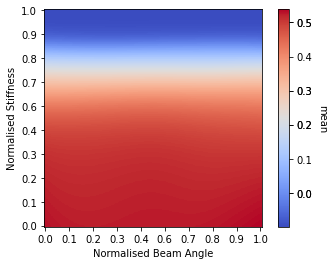

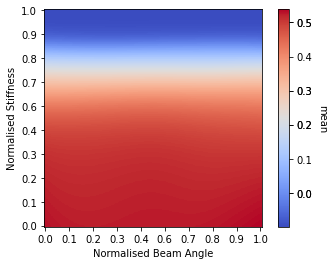

In [8]:
num_y_pts = num_d_pts = 100
plotting_helpers.plot_amortised_phi(forward_approx, y_lims, d_lims, num_y_pts, num_d_pts, 'mean')

In [46]:
forward_approx.phi(0.6,0.2)

Jaxtainer({'log_chol_diag': DeviceArray([[-2.379397]], dtype=float32), 'mean': DeviceArray([[0.45462373]], dtype=float32)})

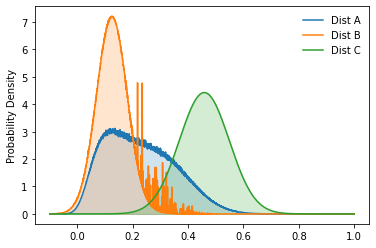

In [17]:
y = jnp.array([[0.5]])
d = jnp.array([[0.9]])
theta = jnp.linspace(-0.1, 1, 5000).reshape(-1,1)
model = oed_toolbox.models.Model.from_surrojax_gp(beam_gp)
true_posterior = computation_helpers.compute_true_log_posterior(model, noise_cov, prior_mean, prior_cov)
pdf_1 = true_posterior(theta, y, d)
minimizer = oed_toolbox.optim.gradient_descent_for_map()
laplace_approx = oed_toolbox.distributions.Posterior.laplace_approximation(model, minimizer, noise_cov, prior_mean, prior_cov)
pdf_2 = jnp.exp(laplace_approx.logpdf(theta, y, d)['logpdf'])
# plotting_helpers.plot_distributions(jnp.stack([pdf_1, pdf_2], axis=0), theta, pdf_labels=['Dist A', 'Dist B'])
pdf_3 = jnp.exp(forward_approx.logpdf(theta, x=y, d=d))
plotting_helpers.plot_distributions(jnp.stack([pdf_1, pdf_2, pdf_3], axis=0), theta, pdf_labels=['Dist A', 'Dist B', 'Dist C'])

Create amortised inference posterior (Normal distribution):

In [13]:
noise_cov = 0.01*jnp.identity(1)
prior_cov = 0.1*jnp.identity(1)
prior_mean = 0.1*jnp.ones((1,))

minimizer = oed_toolbox.optim.gradient_descent_for_map()
ape_laplace = oed_toolbox.losses.APE.using_laplace_approximation(model, minimizer, prior_mean, \
                                                   prior_cov, noise_cov, use_reparameterisation=True)
ape_vals = []
num_samples=100
for d_i in jnp.linspace(0,1,50):
    print(d_i)
    ape_vals.append(ape_laplace(d_i, num_samples))

0.0
0.020408163
0.040816326
0.06122449
0.08163265
0.10204081


KeyboardInterrupt: 

<AxesSubplot:>

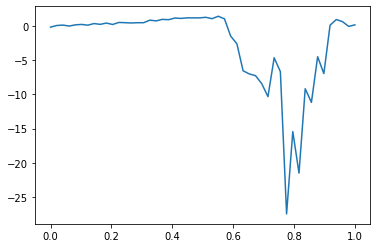

In [28]:
import numpy as np
sns.lineplot(x=np.linspace(0,1,50).squeeze(), y=np.array([x[0] for x in ape_vals]).squeeze())
# sns.lineplot(x=np.linspace(0,1,50).squeeze(), y=np.array([x[1] for x in ape_vals]).squeeze())

In [13]:
prior = oed_toolbox.distributions.Prior.gaussian(prior_mean, prior_cov)
beam_model = oed_toolbox.models.Model.from_surrojax_gp(beam_gp)
likelihood = oed_toolbox.distributions.Likelihood.from_model_plus_constant_gaussian_noise(model, noise_cov)
posterior = oed_toolbox.distributions.Posterior.from_approx_post(forward_approx)
rev_ape = oed_toolbox.losses.APE(prior, likelihood, posterior,  use_reparameterisation=True)

rev_ape_vals = []
num_samples=1000
for d_i in jnp.linspace(0,1,50):
    print(d_i)
    rev_ape_vals.append(rev_ape(d_i, num_samples))

0.0
0.020408163
0.040816326
0.06122449
0.08163265
0.10204081
0.12244898
0.14285713
0.1632653
0.18367347
0.20408162
0.2244898
0.24489796
0.26530612
0.28571427
0.30612245
0.3265306
0.34693876
0.36734694
0.3877551
0.40816325
0.42857143
0.4489796
0.46938774
0.48979592
0.5102041
0.53061223
0.5510204
0.57142854
0.59183675
0.6122449
0.63265306
0.6530612
0.67346936
0.6938775
0.7142857
0.7346939
0.75510204
0.7755102
0.79591835
0.8163265
0.83673465
0.85714287
0.877551
0.8979592
0.9183673
0.9387755
0.95918363
0.97959185
1.0


<AxesSubplot:>

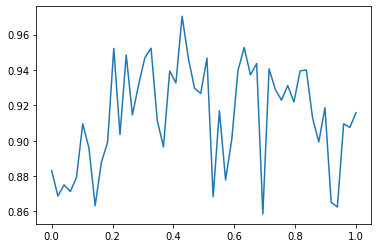

In [14]:
import numpy as np
sns.lineplot(x=np.linspace(0,1,50).squeeze(), y=np.array([x[0] for x in rev_ape_vals]).squeeze())
# sns.lineplot(x=np.linspace(0,1,50).squeeze(), y=np.array([x[1] for x in ape_vals]).squeeze())

In [6]:
noise_cov = 0.01*jnp.identity(1)
prior_cov = 0.1*jnp.identity(1)
prior_mean = 0.1*jnp.ones((1,))

minimizer = oed_toolbox.optim.gradient_descent_for_map()
ape_laplace = oed_toolbox.losses.APE.using_laplace_approximation(model, minimizer, prior_mean, \
                                                   prior_cov, noise_cov, use_reparameterisation=True)
adam = oed_toolbox.optim.adam_for_oed_loss(lr=1e-2)
d_0 = jnp.array([[0.7]])
num_samples = 100
rng = 19
adam(ape_laplace, d_0, num_samples, rng, verbose=True)

NameError: name 'model' is not defined

In [ ]:
prior = oed_toolbox.distributions.Prior.gaussian(prior_mean, prior_cov)
beam_model = oed_toolbox.models.Model.from_surrojax_gp(beam_gp)
likelihood = oed_toolbox.distributions.Likelihood.from_model_plus_constant_gaussian_noise(model, noise_cov)
posterior = oed_toolbox.distributions.Posterior.from_approx_post(forward_approx)
ape = oed_toolbox.losses.APE(prior, likelihood, posterior)
adam = oed_toolbox.optim.adam_for_oed_loss(lr=1e-2)
d_0 = jnp.array([[0.5]])
num_samples = 100
rng = 19
adam(ape, d_0, num_samples, rng, verbose=True)

Create amortised inference posterior (Mixture distribution):

Let's see how the mean and covariance of the Laplace approximation and the amortised distribution change with the beam angle and design: